In [1]:
# For colab training
# from google.colab import drive
# drive.mount('/content/drive')

# import os
# repo_path = '/content/drive/MyDrive/projects/Celpose'
# if not os.path.exists(repo_path):
#     os.makedirs(repo_path)
# os.chdir(repo_path)

Mounted at /content/drive


In [3]:
image_input_file = "/content/drive/MyDrive/projects/Cellpose/input/cropped_section_10.tif"

In [4]:
import tifffile
import matplotlib.pyplot as plt

# Read the image
img = tifffile.imread(image_input_file)

# Print the shape of the image
print(f"Image shape: {img.shape}")


Image shape: (519, 810, 803)


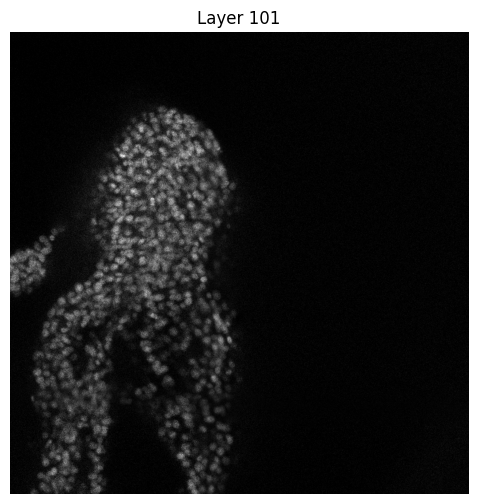

In [5]:


# Specify the layer index to visualize (0-based indexing)
layer_index = 100  # Change this to the specific layer you want to visualize

# Check if the layer index is within bounds
if 0 <= layer_index < img.shape[0]:
    plt.figure(figsize=(6, 6))
    plt.imshow(img[layer_index, :, :], cmap='gray')
    plt.title(f'Layer {layer_index + 1}')
    plt.axis('off')
    plt.show()
else:
    print(f"Invalid layer index: {layer_index}. Please choose a value between 0 and {img.shape[0] - 1}.")


In [6]:
!pip install cellpose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 49.4 MB/s eta 0:00:00


In [7]:
from cellpose import models

# model = models.CellposeModel(gpu=True, pretrained_model='cyto3', diam_mean=30.0)

In [8]:
from cellpose import denoise

In [9]:
denoise_model = denoise.DenoiseModel(gpu=True, model_type='denoise_nuclei',  diam_mean=20.0,)

100%|██████████| 25.3M/25.3M [00:00<00:00, 104MB/s] 
/usr/local/lib/python3.10/dist-packages/cellpose/resnet_torch.py:271: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stat

In [11]:
imgs_dn = denoise_model.eval(img, batch_size=4,
                            channel_axis=None,
                            # z_axis=0,
                            normalize=True,
                            rescale=None,
                            diameter=20,
                            tile=True,
                            do_3D=True,
                            tile_overlap=0.1,
                            bsize=224)

In [12]:
img.shape

(519, 810, 803)

In [13]:
imgs_dn.shape

(519, 810, 803, 1)

In [14]:
from cellpose import models

In [15]:
model = models.CellposeModel(gpu=True, model_type = "nuclei" , diam_mean=20.0)

100%|██████████| 25.3M/25.3M [00:01<00:00, 24.9MB/s]


In [17]:
masks, flows, styles = model.eval(
    x=imgs_dn,  # Your input image array
    batch_size=4,
    do_3D=True,       # Enable 3D segmentation
    diameter=20.0,
    channel_axis = None,
    # anisotropy=2.0    # Adjust anisotropy if needed
)


In [18]:
masks.shape

(519, 810, 803)

In [1]:
# Export of npy files doesn't work cause high running memory require

# from cellpose import models, io

# # ... (your previous code for loading the image and running Cellpose) ...

# # Save the segmentation output
# io.masks_flows_to_seg(
#     images=[img],  # List containing the image
#     masks=[masks],            # List containing the mask
#     flows=[flows],            # List containing the flows
#     file_names=['/content/drive/MyDrive/projects/Cellpose/output/section10_segmented_output'],  # Base filename for saving
#     diams=30.0,              # Diameter used in Cellpose

# )

# print("Segmentation output saved to 'segmented_output_seg.npy'")

In [19]:
from cellpose import models, io, plot

io.save_masks(
    images=[img],  # List containing the image
    masks=[masks],            # List containing the mask
    flows=[flows],            # List containing the flows
    file_names=['/content/drive/MyDrive/projects/Cellpose/output/section10_segmented_output_mask'],  # Base filename for saving
    png=False,                # Disable saving as PNG
    tif=True,                 # Enable saving as TIFF
    channels=[0, 0],           # Channels used in Cellpose
    # ... other parameters if needed ...
)

print("Mask saved as 'segmented_output_cp_masks.tif'")

print("Segmentation output saved as tif")

Mask saved as 'segmented_output_cp_masks.tif'
Segmentation output saved as tif


In [ ]:
import numpy as np

# Assuming `image` is a 3D numpy array of shape [Z, Y, X]
def crop_center(image, crop_depth=100, crop_size=256):
    # Get the center of the image
    z_center, y_center, x_center = np.array(image.shape) // 2

    # Calculate the cropping bounds
    z_start = max(z_center - crop_depth // 2, 0)
    z_end = min(z_center + crop_depth // 2, image.shape[0])
    y_start = max(y_center - crop_size // 2, 0)
    y_end = min(y_center + crop_size // 2, image.shape[1])
    x_start = max(x_center - crop_size // 2, 0)
    x_end = min(x_center + crop_size // 2, image.shape[2])

    # Crop the image
    cropped_image = image[z_start:z_end, y_start:y_end, x_start:x_end]

    return cropped_image

# Crop the image
cropped_image = crop_center(img, crop_depth=10, crop_size=256)

# Check the resulting shape
print("Cropped image shape:", cropped_image.shape)


Cropped image shape: (10, 256, 256)


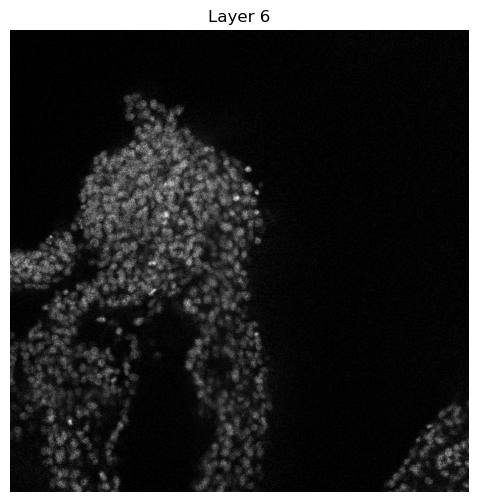

In [ ]:


# Specify the layer index to visualize (0-based indexing)
layer_index = 5  # Change this to the specific layer you want to visualize

# Check if the layer index is within bounds
if 0 <= layer_index < cropped_image.shape[0]:
    plt.figure(figsize=(6, 6))
    plt.imshow(img[layer_index, :, :], cmap='gray')
    plt.title(f'Layer {layer_index + 1}')
    plt.axis('off')
    plt.show()
else:
    print(f"Invalid layer index: {layer_index}. Please choose a value between 0 and {img.shape[0] - 1}.")


In [ ]:
from cellpose import models

model = models.CellposeModel(gpu=True, pretrained_model='cyto3', diam_mean=30.0)


In [ ]:
masks, flows, styles = model.eval(
    x=cropped_image,  # Your input image array
    batch_size=4,
    do_3D=True,       # Enable 3D segmentation
    channel_axis=0, # Set the channel axis
    # channels=[0, 0],  # Specify input channels
    diameter=None,    # Automatically estimate diameter
    anisotropy=2.0    # Adjust anisotropy if needed
)


In [ ]:
masks.shape

(256, 256, 10)

In [ ]:

# Save the 3D mask array as a TIFF file
tifffile.imwrite('output/masks_output_test.tif', cropped_image, imagej=True)

print("Mask saved as 'masks_output.tif'")


Mask saved as 'masks_output.tif'
